## Introducing Scikit-Learn with Linear Regression

This tutorial is based off of:  https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

One of the best known packages that provides access to lots of machine learning algorithms in Python is Scikit-Learn. Scikit-Learn has a clean, uniform, and streamlined use of commands, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is straightforward.  Let's take a look at the basic commands in a scikit-learn analysis.  First, let's take a look at some data.  We are going to import the seaborn package, which is a statistical data visualization tool that extends beyond matplotlib.  It works well with numpy, pandas, and scikit-learn.  We'll also load a demo dataset that is internal to python called `iris`.

Note the tabular output of this data.  Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as `n_features`.

In [8]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This table layout can be thought of as a two-dimensional numerical array or matrix, which we will call the `features matrix`. For Scikit-learn analysis, by convention, this features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features], and is most often contained in a NumPy array or a Pandas DataFrame.  

The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

In addition to the feature matrix `X`, we also generally work with a label or `target array`, which by convention we will usually call `y`. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series. The target array may have continuous numerical values, or discrete classes/labels.  We will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the `target array` is that it is usually the *quantity we want to predict from the data*: in statistical terms, it is the dependent variable. For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the `target array`.

With `seaborn`, you can quickly visualize your datasets - also see the great [Seaborn documentation](https://seaborn.pydata.org/) and some [tutorials](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).  

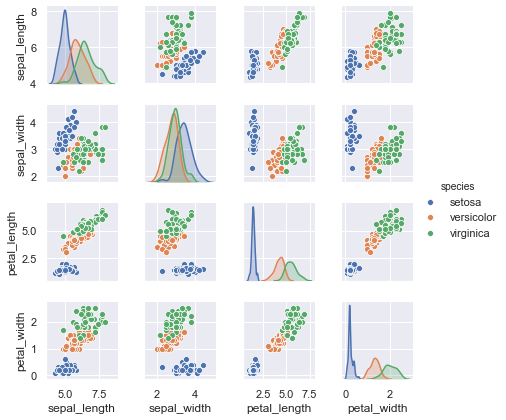

In [10]:
%matplotlib inline

sns.pairplot(iris, hue = 'species', height=1.5)

For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas DataFrame operations.

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [18]:
y_iris = iris['species']
y_iris.shape

(150,)

## Basic steps of Scikit-Learn analysis

Most commonly, the steps in using the Scikit-Learn are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    1. For supervised learning, often we predict labels for unknown data using the predict() method.
    2.  For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

Let's see how this would work for a `linear regression`.  In this class, we do not have time to dive into statistical theory but rather how we can deploy statistical methods.  If you want to learn more about linear regression, I found this [blog](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/) to be helpful.

To learn how to perform a linear regression, let's first create a dataset to build a model from.  

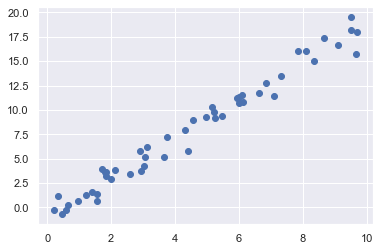

In [19]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)

plt.scatter(x, y)

Choose a class of model by importing the appropriate estimator class from Scikit-Learn. 
Choose model hyperparameters by instantiating this class with desired values.

Let's choose the linear regression model and tell it to fit the intercept.  The parameters for each model are well documented.  The parameters for linear regression are [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  

`fit_intercept : boolean, optional, default True`
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

In [20]:
from sklearn.linear_model import LinearRegression

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

Would we like to fit for the offset (i.e., y-intercept)?
Would we like the model to be normalized?
Would we like to preprocess our features to add model flexibility?
What degree of regularization would we like to use in our model?
How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. You have to know a bit about your model, your question, and your data in order to answer these questions.  There is rarely a one-size-fit-all solution.

But back to our linear regression:
For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [22]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Arrange data into a features matrix and target vector following the discussion above. Our current x from our dataset needs to be a two dimensional array, [n_samples, n_features].  Because we do not have multiple features for this data, we can make an empty n_features column.

Our target vector to predict is `y` and is a 1D array with the shape matching the number of samples.

In [29]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [33]:
y.shape

(50,)

Fit the model to your data by calling the fit() method of the model instance.

In [34]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [35]:
model.coef_

array([1.9776566])

In [36]:
model.intercept_

-0.9033107255311164

In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](https://www.statsmodels.org/stable/examples/index.html).

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [39]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [40]:
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [41]:
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

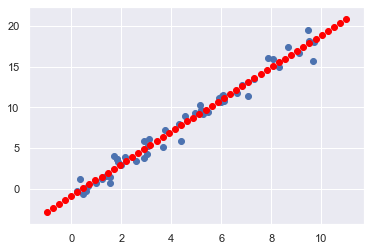

In [44]:
plt.scatter(x,y)
plt.scatter(xfit, yfit, color='red')